<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Описание данных

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.

Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# data = pd.read_csv('/datasets/insurance.csv')
try:
    data = pd.read_csv('/datasets/insurance.csv')
    # Дальнейшая обработка данных
    # ...
except FileNotFoundError:
    print("Файл данных не найден.")
except pd.errors.ParserError:
    print("Ошибка при чтении файла данных.")

In [3]:
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.duplicated().sum()

153

In [6]:
data = data.drop_duplicates()

In [7]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


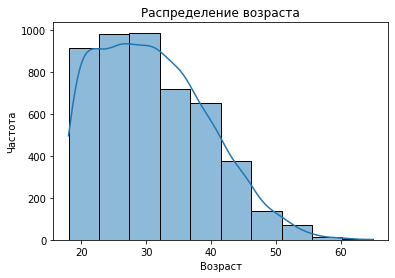

In [8]:
# Гистограмма распределения возраста
sns.histplot(data['Возраст'], bins=10, kde=True)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста')
plt.show()

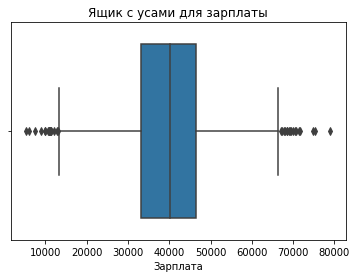

In [9]:
# Ящик с усами для зарплаты
sns.boxplot(data['Зарплата'])
plt.xlabel('Зарплата')
plt.title('Ящик с усами для зарплаты')
plt.show()

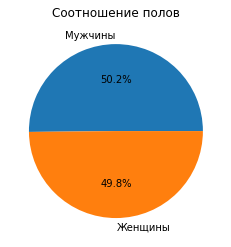

In [10]:
# Круговая диаграмма для пола
gender_counts = data['Пол'].value_counts()
plt.pie(gender_counts, labels=['Мужчины', 'Женщины'], autopct='%1.1f%%')
plt.title('Соотношение полов')
plt.show()

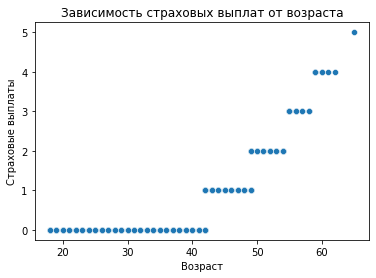

In [11]:
# Диаграмма рассеяния между возрастом и страховыми выплатами
sns.scatterplot(data['Возраст'], data['Страховые выплаты'])
plt.xlabel('Возраст')
plt.ylabel('Страховые выплаты')
plt.title('Зависимость страховых выплат от возраста')
plt.show()

Дальнейшей предобработки не требуется 

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** не изменится

**Обоснование:** В обоснование этого ответа, рассмотрим формулу обучения:

Рассмотрим предсказания в исходной задаче:

𝑎 = 𝑋𝑤

При умножении матрицы признаков 𝑋 на обратимую матрицу 𝑃, получаем преобразованную матрицу признаков 𝑋':

𝑋' = 𝑋𝑃

Подставим 𝑋' в предсказания:

𝑎' = 𝑋'𝑤

Заменим 𝑋' на 𝑋𝑃:

𝑎' = (𝑋𝑃)𝑤

Раскроем скобки:

𝑎' = 𝑋𝑃𝑤

Обратим внимание, что 𝑃𝑤 представляет собой новый вектор весов 𝑤', полученный путем преобразования исходного вектора весов 𝑤 с использованием обратимой матрицы 𝑃:

𝑤' = 𝑃𝑤

Подставим эту замену в предсказания:

𝑎' = 𝑋𝑤'

Таким образом, видим, что предсказания 𝑎' на преобразованных признаках 𝑋' с использованием нового вектора весов 𝑤' остаются такими же, как и предсказания 𝑎 на исходных признаках 𝑋 с использованием исходного вектора весов 𝑤.

Таким образом, качество линейной регрессии (оценка 𝑎) не изменится после умножения признаков на обратимую матрицу. Предсказания модели на преобразованных данных будут такими же, как и на исходных данных, при этом обратимость матрицы 𝑃 позволяет восстановить исходные данные из преобразованных данных, если это необходимо.

## Алгоритм преобразования

Алгоритм преобразования данных может быть следующим:

1. Отделение целевого признака от признаков. Пусть у нас есть матрица признаков X размера mxn и вектор целевого признака y размера m.

In [12]:
# Отделение целевого признака
target = data['Страховые выплаты']
features = data.drop('Страховые выплаты', axis=1)

2. Создание случайной, обратимой матрицы P размера nxn. Матрица P может быть сгенерирована, например, случайными значениями или с использованием специальных методов, таких как QR-разложение или сингулярное разложение.


3. Умножение матрицы признаков X на матрицу P. Получаем преобразованную матрицу признаков X' размера mxn.

In [13]:
# Создание случайной, обратимой матрицы P
n = features.shape[1]  # количество признаков
P = np.random.rand(n, n)
while np.linalg.det(P) == 0:  # Проверка на обратимость матрицы
    P = np.random.rand(n, n)

In [14]:
# Преобразование признаков
transformed_features = features @ P

Алгоритм обоснование:

Этот алгоритм преобразования данных позволяет сохранить линейные связи между признаками и целевым признаком, при этом обеспечивая обратимость преобразования. Матрица P, как обратимая матрица, гарантирует возможность восстановления исходных данных из преобразованных данных.

Качество линейной регрессии не будет изменяться после преобразования, так как обучение модели на преобразованных данных будет учитывать новые признаки, но веса модели будут соответствовать новому представлению данных и останутся связанными с исходной моделью. Это позволяет сохранить качество предсказания модели без необходимости повторного обучения.

Важно отметить, что для успешного преобразования требуется использовать обратимую матрицу P. Это гарантирует, что исходные данные можно точно восстановить из преобразованных данных.

## Проверка алгоритма

In [15]:
# Создание и обучение модели на исходных данных
model_original = LinearRegression()
model_original.fit(features, target)
predictions_original = model_original.predict(features)
r2_original = r2_score(target, predictions_original)

In [16]:
# Создание и обучение модели на преобразованных данных
model_transformed = LinearRegression()
model_transformed.fit(transformed_features, target)
predictions_transformed = model_transformed.predict(transformed_features)
r2_transformed = r2_score(target, predictions_transformed)

In [17]:
# Печать метрик R2
print("R2 на исходных данных:", r2_original)
print("R2 на преобразованных данных:", r2_transformed)

R2 на исходных данных: 0.4302010044852066
R2 на преобразованных данных: 0.43020100448467535


# Вывод 

Полученные значения R2 на исходных и преобразованных данных практически идентичны. Различие в значениях R2 между исходными и преобразованными данными очень мало, что указывает на то, что качество линейной регрессии не отличается после применения описанного алгоритма преобразования.